<a href="https://colab.research.google.com/github/ML-ctrl/Thesis-ML_2022/blob/main/CALENDA_IMAGES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import gdown

# Download the file using gdown
url = "https://drive.google.com/uc?id=1Oh2KZXteF4FyhDO7YXi3X0kOn-yOY_5z"
output = 'Calenda_posts.xlsx'
gdown.download(url, output, quiet=False)

# Read the downloaded Excel file into a Pandas DataFrame
df = pd.read_excel(output, header=None, names=['caption', 'id', 'url'])

# Display the first few rows of the DataFrame to understand what it looks like
print(df.head())

Downloading...
From: https://drive.google.com/uc?id=1Oh2KZXteF4FyhDO7YXi3X0kOn-yOY_5z
To: /content/Calenda_posts.xlsx
100%|██████████| 34.5k/34.5k [00:00<00:00, 29.0MB/s]


                                             caption                   id  \
0                                            caption                   id   
1  Bonomi ha ragione. È incredibile il fatto che ...  3322110098234972018   
2  Parlare ad ogni elezione di “vento che cambia”...  3321294674173990657   
3  Il Patto repubblicano. \n\n1) Stati Uniti d’Eu...  3260379198833313961   
4  Abbiamo analizzato il “maestrale” della Sardeg...  3321984442625111754   

                                        url  
0                                       url  
1  https://www.instagram.com/p/C4agYh2CJdy/  
2  https://www.instagram.com/p/C4Xm-jAiZcB/  
3  https://www.instagram.com/p/C0_MZtriEip/  
4  https://www.instagram.com/p/C4aDz_8CzbK/  


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Load the Excel file
excel_file = "Calenda_posts.xlsx"
df = pd.read_excel(excel_file)

# Iterate through the URLs in the 'url' column
for index, row in df.iterrows():
    # Extract the Instagram post URL from the current row
    instagram_url = row['url']

    # Send a GET request to the Instagram post URL
    response = requests.get(instagram_url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find the meta tag containing the image URL
        meta_tag = soup.find('meta', property='og:image')
        if meta_tag:
            # Extract the content attribute (image URL) from the meta tag
            image_url = meta_tag['content']

            # Send a GET request to download the image
            image_response = requests.get(image_url)

            # Check if the image request was successful (status code 200)
            if image_response.status_code == 200:
                # Open the image using PIL (Python Imaging Library)
                img = Image.open(BytesIO(image_response.content))

                # Display the image
                plt.imshow(img)
                plt.axis('off')
                plt.title(instagram_url)
                plt.show()
            else:
                print(f"Failed to download image from {instagram_url}")
        else:
            print(f"Image URL not found in {instagram_url}")
    else:
        print(f"Failed to fetch Instagram post from {instagram_url}")

In [ ]:
import os
import pandas as pd
import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO

# Create a directory for saving downloaded images
download_dir = "url_downloaded"
if not os.path.exists(download_dir):
    os.makedirs(download_dir)

# Load the Excel file
excel_file = "Calenda_posts.xlsx"
df = pd.read_excel(excel_file)

# Iterate through the URLs in the 'url' column
for index, row in df.iterrows():
    # Extract the Instagram post URL from the current row
    instagram_url = row['url']

    # Send a GET request to the Instagram post URL
    response = requests.get(instagram_url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find the meta tag containing the image URL
        meta_tag = soup.find('meta', property='og:image')
        if meta_tag:
            # Extract the content attribute (image URL) from the meta tag
            image_url = meta_tag['content']

            # Send a GET request to download the image
            image_response = requests.get(image_url)

            # Check if the image request was successful (status code 200)
            if image_response.status_code == 200:
                # Open the image using PIL (Python Imaging Library)
                img = Image.open(BytesIO(image_response.content))

                # Save the image to the download directory
                image_filename = f"{index}.jpg"
                image_path = os.path.join(download_dir, image_filename)
                img.save(image_path)

                print(f"Image downloaded and saved: {image_path}")
            else:
                print(f"Failed to download image from {instagram_url}")
        else:
            print(f"Image URL not found in {instagram_url}")
    else:
        print(f"Failed to fetch Instagram post from {instagram_url}")

Image downloaded and saved: url_downloaded/0.jpg
Image downloaded and saved: url_downloaded/1.jpg
Image downloaded and saved: url_downloaded/2.jpg
Image downloaded and saved: url_downloaded/3.jpg
Image downloaded and saved: url_downloaded/4.jpg
Image downloaded and saved: url_downloaded/5.jpg
Image downloaded and saved: url_downloaded/6.jpg
Image downloaded and saved: url_downloaded/7.jpg
Image downloaded and saved: url_downloaded/8.jpg
Image downloaded and saved: url_downloaded/9.jpg
Image downloaded and saved: url_downloaded/10.jpg
Image downloaded and saved: url_downloaded/11.jpg
Image downloaded and saved: url_downloaded/12.jpg
Image downloaded and saved: url_downloaded/13.jpg
Image downloaded and saved: url_downloaded/14.jpg
Image downloaded and saved: url_downloaded/15.jpg
Image downloaded and saved: url_downloaded/16.jpg
Image downloaded and saved: url_downloaded/17.jpg
Image downloaded and saved: url_downloaded/18.jpg
Image downloaded and saved: url_downloaded/19.jpg
Image down

In [ ]:
#IMAGE NORMALIZATION
import cv2
import os
import numpy as np

def resize_and_crop(img, size):
    # Resize image to maintain aspect ratio
    h, w, _ = img.shape
    if h > w:
        new_h, new_w = size * h / w, size
    else:
        new_h, new_w = size, size * w / h

    new_h, new_w = int(new_h), int(new_w)
    resized_img = cv2.resize(img, (new_w, new_h))

    # Crop the center of the image
    startx = new_w//2 - size//2
    starty = new_h//2 - size//2
    return resized_img[starty:starty+size, startx:startx+size]

def normalize_image(img):
    # Normalize pixel values to [0, 1]
    return img / 255.0

directory = 'url_downloaded'
output_directory = 'images'

if not os.path.exists(output_directory):
    os.makedirs(output_directory)

for filename in os.listdir(directory):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
#    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(directory, filename))
        img = resize_and_crop(img, 256)
        normalized_img = normalize_image(img)

        # Convert the normalized image back to 8-bit format
        img_to_save = (normalized_img * 255).astype(np.uint8)

        # Save the normalized image
        output_path = os.path.join(output_directory, filename)
        cv2.imwrite(output_path, img_to_save)

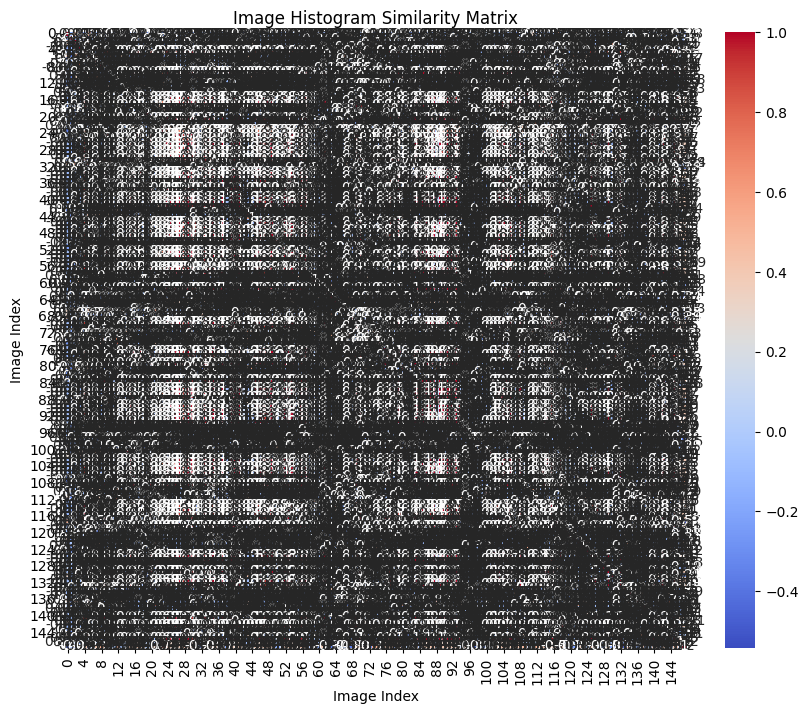

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def compute_histogram(image, bins=256):
    """Compute the color histogram for an image."""
    histogram = [cv2.calcHist([image], [i], None, [bins], [0, 256]) for i in range(3)]
    return np.concatenate(histogram).flatten()

def calculate_similarity(hist_list):
    """Calculate histogram similarity matrix."""
    num_images = len(hist_list)
    similarity_matrix = np.zeros((num_images, num_images))

    for i in range(num_images):
        for j in range(num_images):
            similarity = cv2.compareHist(hist_list[i], hist_list[j], cv2.HISTCMP_CORREL)
            similarity_matrix[i, j] = similarity

    return similarity_matrix

# Directory containing images
image_directory = 'images'

# Load and process images
image_files = [f for f in os.listdir(image_directory) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
histograms = []

for file in image_files:
    image_path = os.path.join(image_directory, file)
    image = cv2.imread(image_path)
    if image is not None:
        hist = compute_histogram(image)
        histograms.append(hist)

# Calculate the similarity matrix
similarity_matrix = calculate_similarity(histograms)

# Plotting the similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm')
plt.title('Image Histogram Similarity Matrix')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
plt.show()

<ipython-input-6-945b8d2ea06e>:26: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(1 - similarity_matrix, method='average')


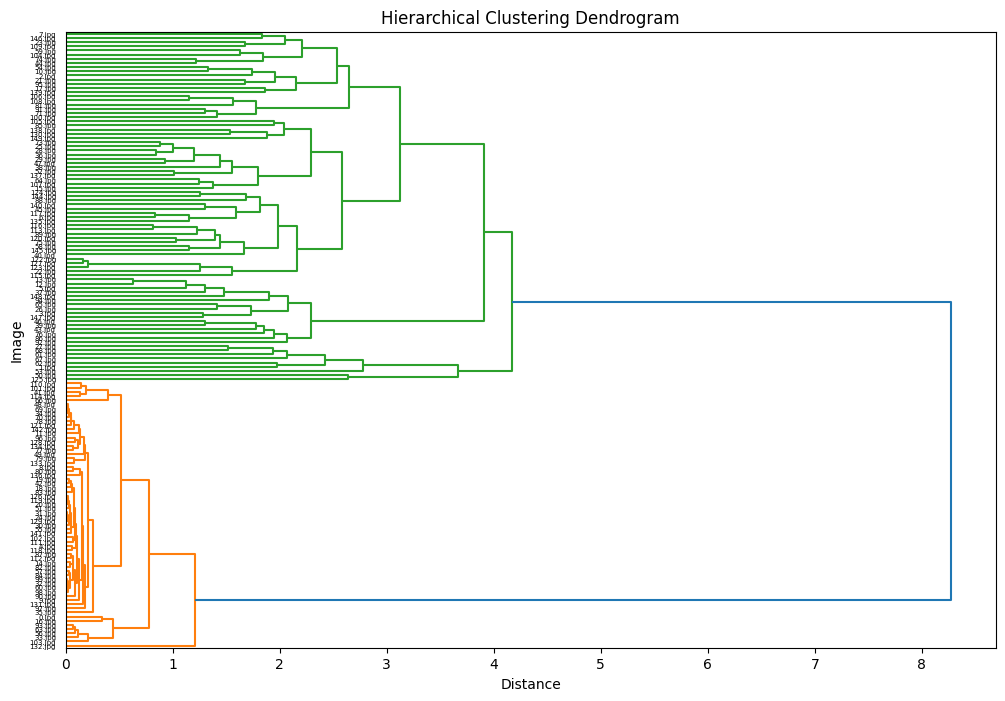

In [ ]:
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Directory containing images
image_directory = 'images'

# Load and process images
image_files = [f for f in os.listdir(image_directory) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
histograms = []

for file in image_files:
    image_path = os.path.join(image_directory, file)
    image = cv2.imread(image_path)
    if image is not None:
        hist = compute_histogram(image)
        histograms.append(hist)

# Calculate the similarity matrix
similarity_matrix = calculate_similarity(histograms)

# Perform hierarchical clustering
Z = linkage(1 - similarity_matrix, method='average')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=image_files, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Image')
plt.show()

<ipython-input-13-579c4520ddf0>:26: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(1 - similarity_matrix, method='average')


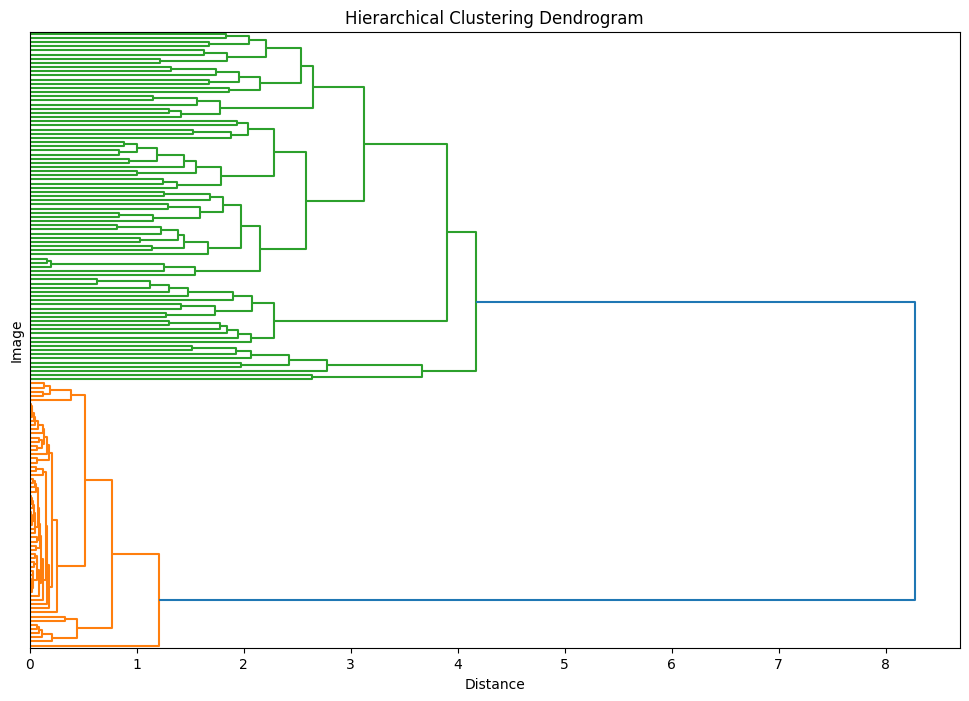

In [ ]:
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Directory containing images
image_directory = 'images'

# Load and process images
image_files = [f for f in os.listdir(image_directory) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
histograms = []

for file in image_files:
    image_path = os.path.join(image_directory, file)
    image = cv2.imread(image_path)
    if image is not None:
        hist = compute_histogram(image)
        histograms.append(hist)

# Calculate the similarity matrix
similarity_matrix = calculate_similarity(histograms)

# Perform hierarchical clustering
Z = linkage(1 - similarity_matrix, method='average')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=image_files, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Image')
plt.tick_params(axis='y', which='both', left=False, labelleft=False)  # Suppress tick labels on y-axis
plt.show()

<ipython-input-7-80e5580f2250>:41: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(1 - similarity_matrix, method='average')


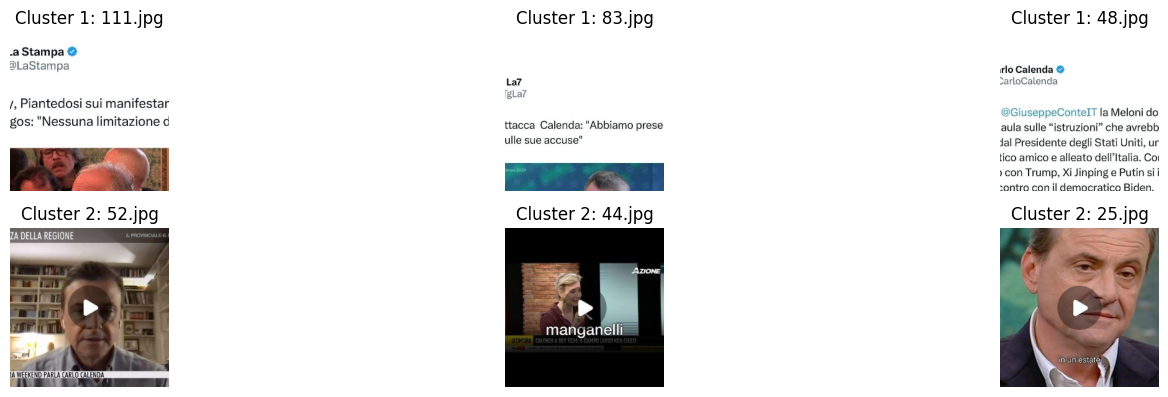

In [ ]:
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Define function to pick random images from clusters
def pick_random_images(image_files, clusters, num_images_per_cluster=3):
    random_images = []
    unique_clusters = np.unique(clusters)

    for cluster_id in unique_clusters:
        cluster_indices = np.where(clusters == cluster_id)[0]
        if len(cluster_indices) >= num_images_per_cluster:
            random_indices = np.random.choice(cluster_indices, num_images_per_cluster, replace=False)
            random_images.extend([(image_files[i], cluster_id) for i in random_indices])
        else:
            random_images.extend([(image_files[i], cluster_id) for i in cluster_indices])

    return random_images

# Directory containing images
image_directory = 'images'

# Load and process images
image_files = [f for f in os.listdir(image_directory) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
histograms = []

for file in image_files:
    image_path = os.path.join(image_directory, file)
    image = cv2.imread(image_path)
    if image is not None:
        hist = compute_histogram(image)
        histograms.append(hist)

# Calculate the similarity matrix
similarity_matrix = calculate_similarity(histograms)

# Perform hierarchical clustering
Z = linkage(1 - similarity_matrix, method='average')

# Determine clusters
num_clusters = 2
clusters = fcluster(Z, num_clusters, criterion='maxclust')

# Pick random images from clusters
random_images = pick_random_images(image_files, clusters)

# Display random images grouped by cluster
plt.figure(figsize=(15, 8))
for i, (image_name, cluster_id) in enumerate(random_images, start=1):
    image_path = os.path.join(image_directory, image_name)
    image = cv2.imread(image_path)
    plt.subplot(4, 3, i)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Cluster {cluster_id}: {image_name}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core

!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 4.2 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Cloning into 'detectron2'...
remote: Enumerating objects: 15536, done.
remote: Counting objects: 100% (261/261), done.
remote: Compressing objects: 100% (217/217), done.
remote: Total 15536 (delta 85), reused 189 (delta 44), pack-reused 15275
Receiving objects: 100% (15536/15536), 6.41 MiB | 12.38 MiB/s, done.
Resolving deltas: 100% (11199/11199), done.


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61400 sha256=2c0d34db60255871d4d8cf4efbb409d32d6fbeb0bab247ae87e0a96121f08e42
  Stored in directory: /root/.cache/pip/wheels/01/c0/af/77c1cf53a1be9e42a52b48e5af2169d40ec2e89f7362489dd0
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=f9ac4bc03093ccdd6b59aebb70c8848fb38303a7dae1620d05121f98b99a728c
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a12

In [ ]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
torch:  2.2 ; cuda:  cu121
detectron2: 0.6


In [ ]:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
!pip install torch torchvision torchaudio

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
import os
import cv2
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from collections import Counter

# Image directory
image_directory = "images"

# Inference with COCO panoptic segmentation model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")

# Set to run on CPU
cfg.MODEL.DEVICE = "cpu"
# Initialize the predictor
predictor = DefaultPredictor(cfg)

# Get COCO metadata to map category IDs to category names
coco_metadata = MetadataCatalog.get(cfg.DATASETS.TRAIN[0])

# List to store information for plotting
all_object_counts = Counter()

# Iterate over image files in the directory
for image_file in os.listdir(image_directory):
    if image_file.endswith(('.jpg', '.jpeg', '.png')):
        # Read the image
        img_path = os.path.join(image_directory, image_file)
        img = cv2.imread(img_path)

        # Make predictions
        panoptic_seg, segments_info = predictor(img)["panoptic_seg"]

        # Count occurrences of all object categories
        category_ids = [segment_info['category_id'] for segment_info in segments_info]
        all_object_counts.update(category_ids)


[04/17 12:25:17 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl ...


model_final_cafdb1.pkl: 261MB [00:03, 73.6MB/s]                           
/usr/local/lib/python3.10/dist-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(15, 6))

# Bar plot for all object counts
objects_names = [coco_metadata.thing_classes[category_id] for category_id in all_object_counts.keys()]
plt.bar(objects_names, all_object_counts.values())
plt.xlabel('COCO Object Name')
plt.ylabel('Frequency')
plt.title('Object frequency')
plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(15, 6))

# Bar plot for all object counts
objects_names = [coco_metadata.thing_classes[category_id] for category_id in all_object_counts.keys()]
object_frequencies = list(all_object_counts.values())
total_objects = sum(object_frequencies)

# Calculate percentages
percentages = [(freq / total_objects) * 100 for freq in object_frequencies]

plt.bar(objects_names, percentages)
plt.xlabel('COCO Object Name')
plt.ylabel('Frequency (%)')
plt.title('Object frequency (%)')
plt.xticks(rotation=90, ha='right')

# Add percentages on top of bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 0.5, f"{percentage:.2f}%", ha='center')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate percentages
percentages = [(freq / total_objects) * 100 for freq in object_frequencies]

# Display object names and their respective percentages
for name, percentage in zip(objects_names, percentages):
    print(f"{name}: {percentage:.2f}%")

In [ ]:
import matplotlib.pyplot as plt

# Filter out "hot dog" category
filtered_object_counts = {category_id: count for category_id, count in all_object_counts.items() if coco_metadata.thing_classes[category_id] != "hot dog"}

# Plotting
plt.figure(figsize=(15, 6))

# Bar plot for filtered object counts
objects_names = [coco_metadata.thing_classes[category_id] for category_id in filtered_object_counts.keys()]
plt.bar(objects_names, filtered_object_counts.values())
plt.xlabel('COCO Object Name')
plt.ylabel('Frequency')
plt.title ("Object frequency")
plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()
